In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
df = pd.read_csv('input/ambient_temperature_system_failure.csv')

In [9]:
df.describe()


,value
count,7267.000000
mean,71.242433
std,4.247509
min,57.458406
25%,68.369411
50%,71.858493
75%,74.430958
max,86.223213


In [11]:
print(df['timestamp'].min())
print(df['timestamp'].max())

2013-07-04 00:00:00
2014-05-28 15:00:00


In [12]:
df.dtypes

timestamp     object
value        float64
dtype: object

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp']) #object to timestamp
df['value'] = (df['value'] - 32)* 5/9 #celsius instead of farenheight

In [21]:
df = df.set_index('timestamp')

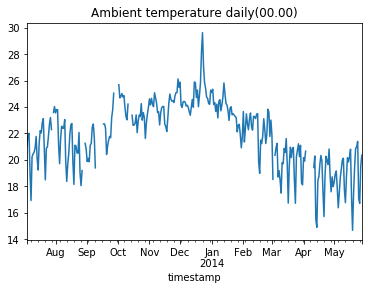

In [31]:
df['value'].asfreq('D').plot()
plt.title("Ambient temperature daily(00.00)")
plt.show()

Shifting and lagging


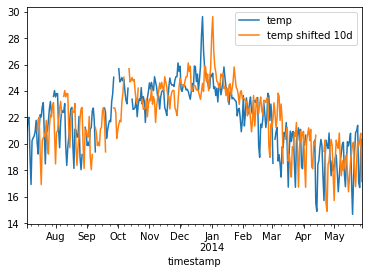

In [36]:
df['value'].asfreq('D').plot(legend = True)
df['value'].asfreq('D').shift(10).plot(legend=True)
plt.legend(['temp', 'temp shifted 10d'])

Rolling windows

In [66]:
rolling_value = df['value'].rolling('30D').mean()

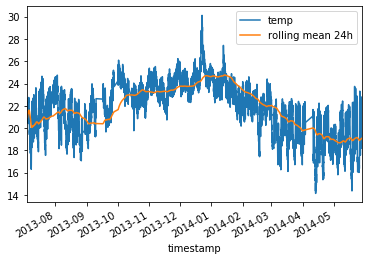

In [67]:
df['value'].plot(legend = True)
rolling_value.plot(legend = True)
plt.legend(['temp', 'rolling mean 30 days'])

Auto corrleation function

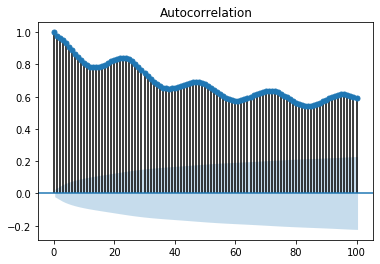

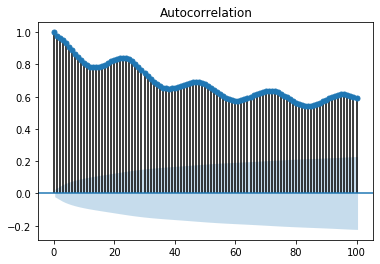

In [72]:
plot_acf(df['value'], lags = 100)

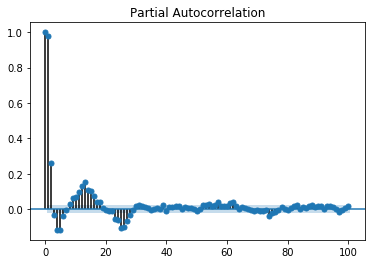

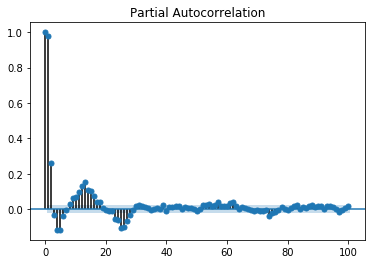

In [73]:
plot_pacf(df['value'], lags = 100)